## Observations and Insights 

In [342]:
%matplotlib inline

In [343]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from matplotlib.pyplot import figure
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
common_column = mouse_metadata.columns & study_results.columns
master_data = pd.merge(mouse_metadata, study_results, on = common_column[0])
master_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [344]:
# Checking the number of mice in the DataFrame.
num_mouse = len(master_data["Mouse ID"].value_counts())
print(f"Number of mice in the datafrme is {num_mouse}.")

Number of mice in the datafrme is 249.


In [345]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
master_data["duplicated_check"] = master_data["Mouse ID"] + "_"+ master_data["Timepoint"].astype(str)
master_data[master_data["duplicated_check"].duplicated()]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,duplicated_check
909,g989,Propriva,Female,21,26,0,45.000000,0,g989_0
911,g989,Propriva,Female,21,26,5,47.570392,0,g989_5
913,g989,Propriva,Female,21,26,10,49.880528,0,g989_10
915,g989,Propriva,Female,21,26,15,53.442020,0,g989_15
917,g989,Propriva,Female,21,26,20,54.657650,1,g989_20


### Mouse ID `g989` has duplicated timepoint

In [356]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_masterdata = master_data.drop(index=master_data[master_data["duplicated_check"].duplicated()].index)
clean_masterdata = clean_masterdata.drop(columns = "duplicated_check")
clean_masterdata.head(30)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [6]:
# Checking the number of mice in the clean DataFrame.
num_mouse = len(clean_masterdata["Mouse ID"].value_counts())
print(f"The number of mice in clean dataset has {num_mouse}.")

The number of mice in clean dataset has 249.


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function.
summary_stats_regimen = (clean_masterdata.groupby("Drug Regimen")
                         .agg({"Tumor Volume (mm3)":["mean", "median","var","std","sem"]})).applymap("{:.2f}".format)
                        
summary_stats_regimen


Tumor Volume (mm3)                          
                           mean median    var   std   sem
Drug Regimen                                             
Capomulin                 40.68  41.56  24.95  4.99  0.33
Ceftamin                  52.59  51.78  39.29  6.27  0.47
Infubinol                 52.88  51.82  43.13  6.57  0.49
Ketapril                  55.24  53.70  68.55  8.28  0.60
Naftisol                  54.33  52.51  66.17  8.13  0.60
Placebo                   54.03  52.29  61.17  7.82  0.58
Propriva                  52.39  50.91  43.14  6.57  0.53
Ramicane                  40.22  40.67  23.49  4.85  0.32
Stelasyn                  54.23  52.43  59.45  7.71  0.57
Zoniferol                 53.24  51.82  48.53  6.97  0.52

## Bar Plots

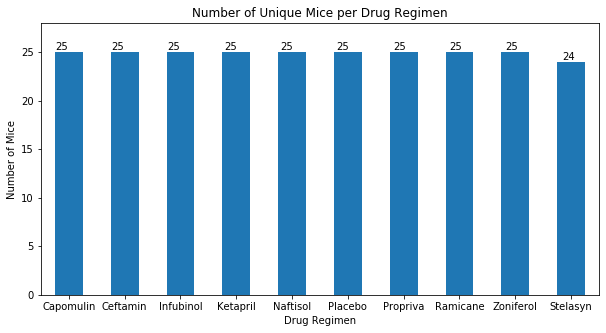

In [405]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
num_of_count_regimen = clean_masterdata.groupby("Drug Regimen").agg(count_of_mice = ("Mouse ID","nunique")).sort_values(by = "count_of_mice", ascending = False)
num_chart = num_of_count_regimen.plot(kind = "bar", legend = False, 
                                      title = "Number of Unique Mice per Drug Regimen", 
                                      rot = 0,figsize = (10,5),ylim= (0,max(num_of_count_regimen["count_of_mice"])+3))

num_chart.set_ylabel("Number of Mice")


# getting value for each bar
for p in num_chart.patches:
     num_chart.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.01))

plt.show()

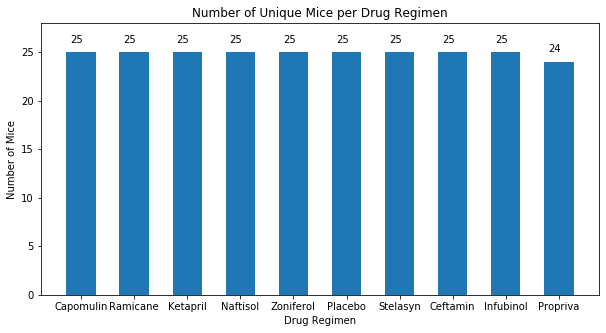

In [406]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
durg_regimen = clean_masterdata["Drug Regimen"].value_counts().keys().astype(str)
num_of_mice = num_of_count_regimen["count_of_mice"].values

plt.figure(figsize=(10,5))
plt.bar(timepoint_label, num_of_mice, width=0.55)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.ylim(0,max(num_of_mice)+3)
plt.title("Number of Unique Mice per Drug Regimen")


# add value to the bar chart
x_axis = -0.2
for i in range(len(durg_regimen)):
    plt.annotate(num_of_mice[i],(x_axis,num_of_mice[i]+1))
    x_axis = x_axis+1


plt.show()


## Pie Plots

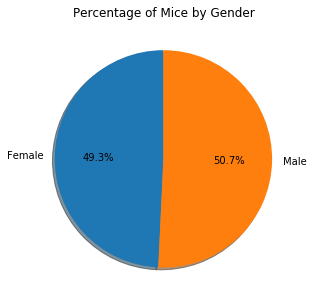

In [136]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_summary = clean_masterdata.groupby("Sex").agg(count = ("Sex","count")).rename(columns = {"count":"Number of Mice"})
pie_chart = gender_summary.plot(kind = "pie",y = "Number of Mice", figsize = (5,5),
                    title= "Percentage of Mice by Gender", autopct="%1.1f%%",
                    shadow=True, startangle=90, legend = False)

pie_chart.set_ylabel("")
plt.show()


/Users/yangsun/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


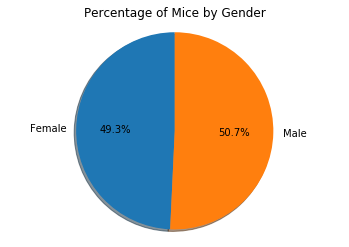

In [135]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_value = gender_summary.values
gender = gender_summary.index

plt.pie(pie_value, labels = gender, autopct="%1.1f%%",
        shadow = True, startangle=90)
plt.title("Percentage of Mice by Gender")
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [749]:

# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
# finding the index of smallest and largest timepoint 
drug_effectiveness_top4 = (clean_masterdata.groupby(["Mouse ID","Drug Regimen"])
                 .agg(final_tumor_index = ("Timepoint","idxmax"),
                      begin_tumor_index = ("Timepoint","idxmin")))

# use the index of the timepoint index to find out the begin and final tumor vol
begin_index = drug_effectiveness_top4["begin_tumor_index"].values
final_index = drug_effectiveness_top4["final_tumor_index"].values
data_index = drug_effectiveness_top4.index

# structure begin and final tumor vol into data frame and calculate tumor vol decrease percentage for each mouse
drug_effectiveness_df = pd.DataFrame(data = {"begin_tumor_vol":list(clean_masterdata.loc[begin_index,"Tumor Volume (mm3)"]),
                                             "final_tumor_vol":list(clean_masterdata.loc[final_index,"Tumor Volume (mm3)"])}, index= id)
drug_effectiveness_df["decrease_percentage"] = (drug_effectiveness_df["final_tumor_vol"] - drug_effectiveness_df["begin_tumor_vol"])/drug_effectiveness_df["begin_tumor_vol"]*100

# groupby by durg regimen and find out the average decrease percentage for each drug and select top 4
top4_effective_drug = (drug_effectiveness_df.groupby("Drug Regimen")
                       .agg(avg_decrease_percent = ("decrease_percentage","mean"))
                       .sort_values(by = "avg_decrease_percent", ascending = False)
                       .applymap("{:.2f}%".format)).head(4)

# I define promising treatment regimens as regimens with highest percentage decrease between beginning tumor vol and final tumor vol
print(f"Four of the most promising treatment regimens are {top4_effective_drug.index[0]}, {top4_effective_drug.index[1]}, {top4_effective_drug.index[2]} and {top4_effective_drug.index[3]}.".format(top4_effective_drug.index))
top4_effective_drug

Four of the most promising treatment regimens are Ketapril, Naftisol, Stelasyn and Placebo.


,avg_decrease_percent
Drug Regimen,
Ketapril,39.57%
Naftisol,36.01%
Stelasyn,35.56%
Placebo,34.46%


### Final tumor of each mouse for these four regimen:


In [766]:
### Final tumor of each mouse for these four regimen:
final_tumor_each_mouse= clean_masterdata.loc[final_index,:]
final_tumor_each_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
463,a203,Infubinol,Female,20,23,45,67.973419,2
473,a251,Infubinol,Female,21,25,45,65.525743,1
483,a262,Placebo,Female,17,29,45,70.717621,4
493,a275,Ceftamin,Female,20,28,45,62.999356,3
500,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
1862,z435,Propriva,Female,12,26,10,48.710661,0
84,z578,Ramicane,Male,11,16,45,30.638696,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [797]:
# Calculate the IQR and quantitatively determine if there are any potential outliers
def iqr(series) -> float:
    """return IQR of a series
    """
    return series.quantile(.75) - series.quantile(.25)

# IQR for each durg regimen
drug_iqr_summary = clean_masterdata.groupby(["Drug Regimen"]).agg(IQR = ("Tumor Volume (mm3)",iqr)).sort_values(by = "IQR",ascending = False)
drug_iqr_summary




,IQR
Drug Regimen,
Naftisol,12.677160
Ketapril,12.637964
Placebo,12.457882
Stelasyn,10.672158
Zoniferol,10.616383
Infubinol,10.002091
Ceftamin,9.593010
Propriva,9.445517
Ramicane,8.325365


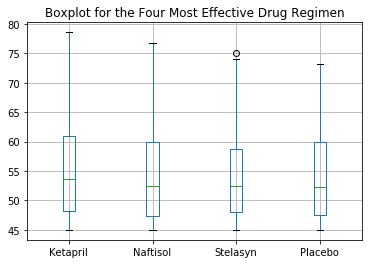

In [845]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
top4_regimen_df = clean_masterdata.loc[clean_masterdata["Drug Regimen"].isin(top4_effective_drug.index)]

# loop through each drug regimen and generate a boxplot
for i in range(len(top4_effective_drug.index)):
    top4_regimen_df.loc[top4_regimen_df["Drug Regimen"]==top4_effective_drug.index[i],["Tumor Volume (mm3)"]].boxplot(positions = [i+1])

plt.xticks(ticks=[i+1 for i in range(len(top4_effective_drug.index))], labels =top4_effective_drug.index)    
plt.title("Boxplot for the Four Most Effective Drug Regimen")
plt.show()



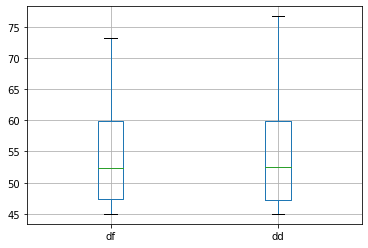

In [835]:



top4_regimen_df.loc[top4_regimen_df["Drug Regimen"]=="Placebo",["Tumor Volume (mm3)"]].boxplot(positions = [1])
top4_regimen_df.loc[top4_regimen_df["Drug Regimen"]=="Naftisol",["Tumor Volume (mm3)"]].boxplot(positions = [2])
plt.xticks(ticks = [1,2], labels = ["df","dd"])

plt.show()


## Line and Scatter Plots

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
